#### Random Forest

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 89}
Best Estimator: RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=89, random_state=4)
Accuracy: 0.9200652528548124
Precision: 0.8934169278996865
Recall: 0.95
F1-score: 0.9208400646203554
Confusion Matrix:
[[279  34]
 [ 15 285]]




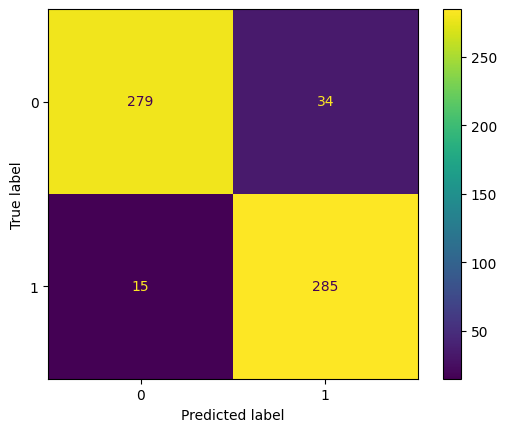

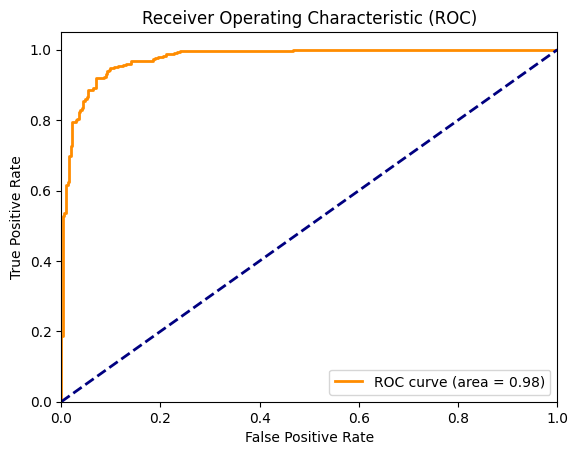

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=4)

# Define hyperparameter search space
params = {'n_estimators': sp_randint(50, 100),
          'max_features': sp_randint(2, 10),
          'max_depth': sp_randint(2, 8),
          'min_samples_split': sp_randint(2, 10),
          'min_samples_leaf': sp_randint(1, 10),
          'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
rsearch = RandomizedSearchCV(rfc,
                             param_distributions=params,
                             n_iter=50,
                             cv=10,
                             return_train_score=True,
                             scoring='roc_auc',
                             n_jobs=-1,
                             random_state=5)

# Fit RandomizedSearchCV on the standardized data
rsearch.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = rsearch.best_params_
best_rfc = rsearch.best_estimator_
# Print best parameters
print("Best Parameters:", best_params)
print("Best Estimator:", best_rfc)

# Evaluate the best model
y_pred_rf = rsearch.predict(X_test_scaled)
compute_metrics(y_test,y_pred_rf,rsearch)

In [ ]:
save_rf = {
    'model': rsearch,
    'scaler': scaler,
    'best_classifier': best_rfc,
    'best_params': best_params
}

with open('model_rf.pkl', 'wb') as model_file:
    pickle.dump(save_rf, model_file)